# Projeto 1 
## Ciência do Dados

## Nome: André Luís Silva Lopes
## Turma: 2A

### Análise e verificação de dados referentes à taxa de fertilidade e Expectativa de Vida de todos os países. Visando analisar se existe uma possível relação entre esses dois indicadores; e além disso, se o fato de um país pertencer a União Europeia altera esses indices de forma padronizada. Ou seja, se um país entra na União Europeia a Taxa de Fertilidade do mesmo tende a diminuir e a Expectativa de Vida a aumentar.

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.polynomial.polynomial import polyfit


## Pergunta:
### Um país membro da União Europeia apresenta Taxa de Fertilidade menores e Expectativa de Vida maiores que os países não mebros? Ou seja a partir do momento que um país ingressa na União Europeia estes indicadores têm o comportamento alterado, apresentando alguma tendência?

## Hipótese:
### Espera-se que as taxas de fertilidade dos países pertencentes as U.E (União Europeia) sejam menores que as dos demais países. Também espera-se que a expectativa de vida em países mebros da organização sejam maiores que aos demais.

## Mecanismo: 
### Isso provavelmente ocorre devido à melhoras em indicadores economicos, de saúde e sociais; decorrente de acesso a tratados economicos, infraestrutura, encarecimento do custo por filho. Ademais, fatores como revolução tecnológica e avanço da medicina, provavelmente, estão muito ligados a esses indicadores. No entanto, este trabalho visa analisar uma possível relação entre essas taxas limitadas pelo pertencimento ou não pertencimento ao bloco. 

### Referência:
### https://ec.europa.eu/eurostat/statistics-explained/pdfscache/19883.pdf



# -------------------------------------------------------------------------------------------------------

### Primeiramente vamos analisar a base de dados referente as respectivas Taxas de Fertlidade de todos os países do mundo. 

#### O link para a base de dados no Gapminder: https://www.gapminder.org/tools/#$state$time$value=2018&delay:188.1419354838712;&entities$filter$;&dim=geo;&marker$axis_x$domainMin:null&domainMax:null&zoomedMin=194&zoomedMax=96846;&axis_y$which=children_per_woman_total_fertility&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null;&color$which=world_6region;;;&ui$chart$trails:false;;&chart-type=bubbles


In [8]:
babies = pd.read_excel('babies.xlsx')
babies

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03
5,Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,2.38,2.37,2.36,2.35,2.34,2.32,2.31,2.29,2.28,2.26
6,Armenia,7.80,7.80,7.81,7.81,7.81,7.82,7.82,7.82,7.83,...,1.60,1.55,1.50,1.73,1.71,1.69,1.66,1.63,1.60,1.60
7,Australia,6.50,6.48,6.46,6.44,6.42,6.40,6.38,6.36,6.34,...,1.94,1.93,1.92,1.90,1.89,1.87,1.86,1.85,1.84,1.83
8,Austria,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,...,1.39,1.44,1.44,1.46,1.47,1.48,1.49,1.49,1.50,1.52
9,Azerbaijan,8.10,8.10,8.10,8.10,8.10,8.10,8.10,8.10,8.10,...,1.91,1.96,2.01,2.05,2.08,2.09,2.09,2.08,2.06,2.04


In [9]:
data_babies = babies.set_index("country")

In [10]:
data_babies

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03
Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,2.38,2.37,2.36,2.35,2.34,2.32,2.31,2.29,2.28,2.26
Armenia,7.80,7.80,7.81,7.81,7.81,7.82,7.82,7.82,7.83,7.83,...,1.60,1.55,1.50,1.73,1.71,1.69,1.66,1.63,1.60,1.60
Australia,6.50,6.48,6.46,6.44,6.42,6.40,6.38,6.36,6.34,6.32,...,1.94,1.93,1.92,1.90,1.89,1.87,1.86,1.85,1.84,1.83
Austria,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,...,1.39,1.44,1.44,1.46,1.47,1.48,1.49,1.49,1.50,1.52


### Aqui vamos criar uma variável qualitativa para classificar quais são os países membros da União Europeia. Visando uma maior praticidade na manipulação dos dados. Ademais, isso faz com que seja possíevl "quebrar" o dataframe em dois. Podendo assim realizar análises comparativas entre dois grupos distintos: Os Membros e Os Não Membros. Dessa forma é possível dar um passo adiante na análise do comportamento desses indicies e melhor visualizar a tendencia de comportamento.

In [11]:
Membros = ['Austria', 'Italy', 'Belgium', 'Latvia',
                     'Bulgaria', 'Lithuania', 'Croatia',
                     'Luxembourg', 'Cyprus', 'Malta', 
                      'Netherlands', 'Denmark',
                     'Poland', 'Estonia', 'Portugal', 'Finland',
                     'Romania', 'France', 'Germany',
                     'Slovenia', 'Greece', 'Spain', 'Hungary',
                     'Sweden', 'Ireland', 'United Kingdom']

data_babies["Membro"] = [int(country in Membros) for country in data_babies.index.tolist()]

In [12]:
data_babies

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Membro
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33,0
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71,0
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64,0
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55,0
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03,0
Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,2.37,2.36,2.35,2.34,2.32,2.31,2.29,2.28,2.26,0
Armenia,7.80,7.80,7.81,7.81,7.81,7.82,7.82,7.82,7.83,7.83,...,1.55,1.50,1.73,1.71,1.69,1.66,1.63,1.60,1.60,0
Australia,6.50,6.48,6.46,6.44,6.42,6.40,6.38,6.36,6.34,6.32,...,1.93,1.92,1.90,1.89,1.87,1.86,1.85,1.84,1.83,0
Austria,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,...,1.44,1.44,1.46,1.47,1.48,1.49,1.49,1.50,1.52,1


In [13]:
dados_babies_membros = data_babies[data_babies.Membro > 0]

In [14]:
dados_babies_nao_membros = data_babies[data_babies.Membro < 1]

In [15]:
dados_babies_membros = dados_babies_membros.drop(columns = "Membro")

In [16]:
dados_babies_nao_membros = dados_babies_nao_membros.drop(columns = "Membro")

### Nesta etapa, vamos realizar outro corte no dataframe. Porém dessa vez ele é um corte temporal. Visando obter duas séries onde estejam, nelas contidas, dados referentes a taxa de fertilidade antes e depois da fundação da União Europeia. Permitindo assim, uma flexibilidade maior para a análise das tendências desses dois grandes "blocos" de dados.

In [17]:
inicio =  1928
fim    =  1974
passo  =  1

intervalo_anos_antes = np.arange(inicio, fim, passo)

babies_membros_intervalo_antes = dados_babies_membros.loc[:, intervalo_anos_antes]

inicio =  1973
fim    =  2018
passo  =  1

intervalo_anos_depois = np.arange(inicio, fim, passo)

babies_membros_intervalo_depois = dados_babies_membros.loc[:, intervalo_anos_depois]

### Antes da discrição de análise gráfica é imprtante salientar que como estamos tratando de diversos dados subsequêntes e sucetivos no dataframe; se fóssemos plotar um gráfico com a taxa de fertilidade de cada país a cada ano a confusão de dados em uma série temporal seria enrome. Assim, não permitindo uma análise visual, propósito do gráfico, muito menos matemática dos possíveis comportamentos desses grupos. 

### Dessa forma optou-se por trabalhar com as médias anuais de todos os países ao longo dessas faixas de tempo, permitindo uma comparação mais limpa e verificar uma tendência por grupo de países análisado e não somente um país independente. Facilitando assim todo o processo de análise deste índice.

In [18]:
media_babies_membros_antes = babies_membros_intervalo_antes.mean(axis = 0, skipna = True)
media_babies_membros_depois = babies_membros_intervalo_depois.mean(axis = 0, skipna = True)

In [19]:
babies_nao_membros_intervalo_antes = dados_babies_nao_membros.loc[:, intervalo_anos_antes]
babies_nao_membros_intervalo_depois = dados_babies_nao_membros.loc[:, intervalo_anos_depois]

In [20]:
media_babies_nao_membros_antes  = babies_nao_membros_intervalo_antes.mean(axis = 0, skipna = True)
media_babies_nao_membros_depois = babies_nao_membros_intervalo_depois.mean(axis = 0, skipna = True)

### Chegamos então à uma análise crucial ao projeto. No gráfico abaixo é possível verificar através das linhas de tendência plotadas, a tendencia da taxa de fertilidade dos países membros da União Europeia antes e depois do ingresso na mesma. Com isso podemos verificar que antes do igresso na União Europeia a Taxa de Fertilidade vinha caindo em média 1.5% ao ano. E após 1973 essa taxa diminui para 1.4% ao ano. Ou seja, praticamente manteve-se mesmo com o ingresso na União Europeia.

Coeficiente ângular da linha de tendência antes: -0.015579805023838307
Coeficiente ângular da linha de tendência depois: -0.014020117563595797


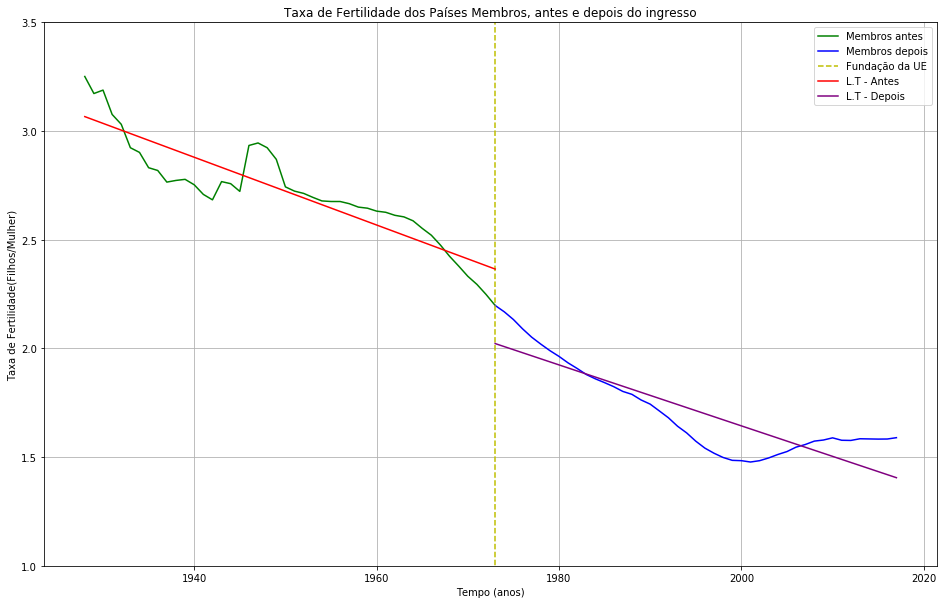

In [42]:
plt.figure(figsize = (16, 10))
plt.plot(media_babies_membros_antes, label = 'Membros antes', color = 'green')
plt.plot(media_babies_membros_depois, label = 'Membros depois', color = 'blue')
plt.plot([1973,1973],[0,82], 'y--', label = 'Fundação da UE')
# plt.plot([1960,1960],[0,82], 'y--', label = 'Pílula Anticoncepcional', color = 'red')

#  ------------------------------------------
x  = intervalo_anos_antes
y1 = media_babies_membros_antes

b, m1 = polyfit(x, y1, 1)
plt.plot(x, b + m1*x, '-', color = 'red', label = 'L.T - Antes')

print("Coeficiente ângular da linha de tendência antes: {0}".format(m1))
# ----------------------------------
x  = intervalo_anos_depois
y2 = media_babies_membros_depois

b, m2 = polyfit(x, y2, 1)
plt.plot(x, b + m2*x, '-', color = 'purple', label = 'L.T - Depois')

print("Coeficiente ângular da linha de tendência depois: {0}".format(m2))
# ------------------------------------

plt.ylim(1,3.5)
plt.xlabel('Tempo (anos)')
plt.ylabel('Taxa de Fertilidade(Filhos/Mulher)')
plt.title('Taxa de Fertilidade dos Países Membros, antes e depois do ingresso')
plt.legend()
plt.grid(True)
plt.show()

### No gráfico abaixo é possível verificar através das linhas de tendência plotadas, como ao gráfico acima, a tendência da taxa de fertilidade dos países não membros da União Europeia antes e depois da fundação do Bloco Econômico. Com isso podemos verificar que antes da fundação da União Europeia a Taxa de Fertilidade vinha caindo em média 0.09% ao ano. E após 1973 essa taxa aumentou para 6.2% ao ano. Ou seja, houve um aumento na velocidade de decressimento desse índice.

Coeficiente ângular da linha de tendência antes: -0.0009033790403478835
Coeficiente ângular da linha de tendência depois: -0.06234911859375243


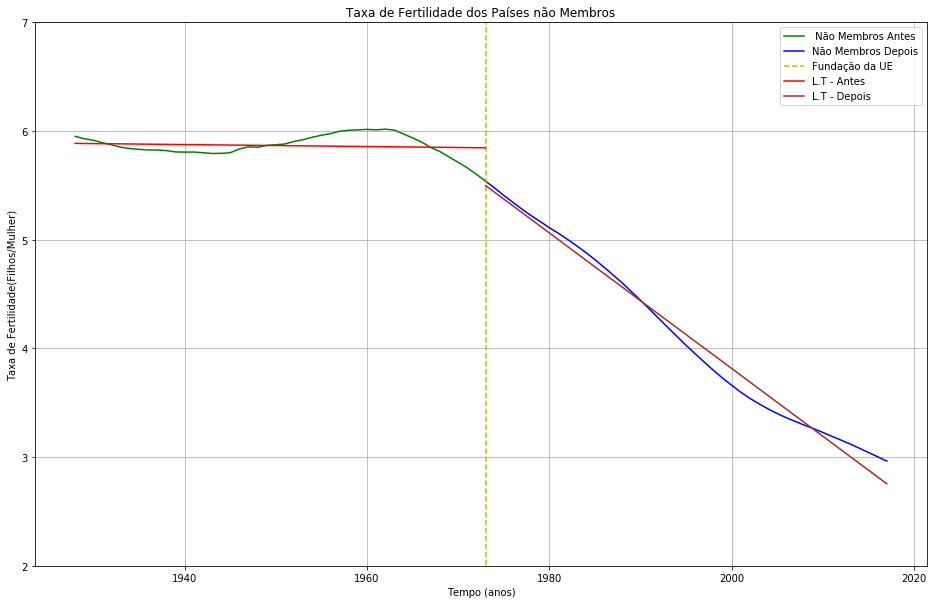

In [47]:
plt.figure(figsize = (16, 10))
plt.plot(media_babies_nao_membros_antes, label = ' Não Membros Antes', color = 'green')
plt.plot(media_babies_nao_membros_depois, label = 'Não Membros Depois', color = 'blue')
plt.plot([1973,1973],[0,82], 'y--', label = 'Fundação da UE')
# plt.plot([1960,1960],[0,82], 'y--', label = 'Pílula Anticoncepcional', color = 'red')

#  ------------------------------------------
x  = intervalo_anos_antes
y5 = media_babies_nao_membros_antes

b, m5 = polyfit(x, y5, 1)
plt.plot(x, b + m5*x, '-', color = 'red', label = 'L.T - Antes')

print("Coeficiente ângular da linha de tendência antes: {0}".format(m5))
# ----------------------------------
x  = intervalo_anos_depois
y6 = media_babies_nao_membros_depois

b, m6 = polyfit(x, y6, 1)
plt.plot(x, b + m6*x, '-', color = 'brown', label = 'L.T - Depois')

print("Coeficiente ângular da linha de tendência depois: {0}".format(m6))
# ------------------------------------

plt.ylim(2,7)
plt.xlabel('Tempo (anos)')
plt.ylabel('Taxa de Fertilidade(Filhos/Mulher)')
plt.title('Taxa de Fertilidade dos Países não Membros')
plt.legend()
plt.grid(True)
plt.show()

### É importante enfatizar que essa análise de dados em específico pode haver uma alteração relevante para a análise. Como estamos análisando basicamente como linha de corte as taxas de fertilidade no início da década de 70; os dados nesse período são mais alterados pela invenção e implementação da pílula anticoncepcional nos anos 60. Ou seja, a análise dessa variável neste período deve ser feita com cautela e com suas devidas preocauções.

### Dessa forma, chegamos à uma possível análise de que a hipótese incial pode ser refutada. Isso porque era esperado que ao ingressar na União Europeia esse índice diminuísse muito. Em outras palavras, esperava-se que a diminuição percentual aumentasse entre esses dois períodos de forma espressiva; entretanto isso não ocorreu. Sendo que o acressímo foi somente de 0.1% ao ano. Entre tanto é importante levarmos em conta o supracitado (Pílula) que pode alterar esse fluxo.

### Outro indício de que a hipótese pode começar a ser refutada é que os demais países apresentavam decréssimo médio anual de aproximadademente 0.09%; e após a fundação da União Europeia aceleraram o decréssimo para cerca de 6.2% ao ano. Sendo até maior do que o decréssimo médio apresentado pelos países da União Europeia.

## ------------------------------------------------------------------------------------------------------------------------

### Agora vamos análisar outra base de dados que se diz respeito a expectativa de vida. Variável que queremos análisar para tentar confirmar ou refutar a hipótese. E ainda se possível verificar se existe uma possível correlação entre Taxa de Fertilidade e Expectativa de Vida.

### O procedimento adotado para análise, organização e manipulação deste dataframe será o mesmo que o adotado na base de dados anterior. Ou seja, este dataframe será quebrado em blocos temporais para análise "antes e depois"; além da criação de uma variável qualitativa para separar os países membros e não membros. Dessa forma não vamos nos estender em processo de codificação e sim abrir espaço para análise posterior.

#### o link para a base de dados no gapminder: https://www.gapminder.org/tools/#$state$time$value=2010&delay:188.1419354838712;&entities$filter$;&dim=geo;&marker$axis_x$domainMin:null&domainMax:null&zoomedMin=194&zoomedMax=96846;&axis_y$which=data_quality_life_expectancy&domainMin:null&domainMax:null&zoomedMin:null&zoomedMax:null;&color$which=world_6region;;;&ui$chart$trails:false;;&chart-type=bubbles

In [22]:
data_life = pd.read_excel('espc.xlsx')
data_life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
5,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
6,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0
7,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,73.0,73.3,73.8,74.3,75.0,75.4,75.4,75.7,75.8,76.0
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.8,82.0,82.2,82.3,82.5,82.6,82.6,82.5,82.7,82.9
9,Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,80.3,80.5,80.7,80.9,81.1,81.3,81.4,81.5,81.7,81.8


In [23]:
life = data_life.set_index('country')
life

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2
Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.9,76.8,76.9,77.0,77.3,77.1,77.2,77.3,77.4,77.6
Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.7,76.8,77.0
Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,73.0,73.3,73.8,74.3,75.0,75.4,75.4,75.7,75.8,76.0
Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,81.8,82.0,82.2,82.3,82.5,82.6,82.6,82.5,82.7,82.9


In [24]:
Membros = ['Austria', 'Italy', 'Belgium', 'Latvia',
                     'Bulgaria', 'Lithuania', 'Croatia',
                     'Luxembourg', 'Cyprus', 'Malta', 
                      'Netherlands', 'Denmark',
                     'Poland', 'Estonia', 'Portugal', 'Finland',
                     'Romania', 'France', 'Germany',
                     'Slovenia', 'Greece', 'Spain', 'Hungary',
                     'Sweden', 'Ireland', 'United Kingdom']


life["Membro"] = [int(country in Membros) for country in life.index.tolist()]

In [27]:
life_membros = life[life.Membro > 0]

In [28]:
life_nao_membros = life[life.Membro < 1]

In [29]:
life_membros_new = life_membros.drop(columns = "Membro")

In [30]:
life_nao_membros_new = life_nao_membros.drop(columns = "Membro")

In [31]:
inicio =  1928
fim    =  1974
passo  =  1

intervalo_anos_antes = np.arange(inicio, fim, passo)

life_membros_intervalo_antes = life_membros_new.loc[:, intervalo_anos_antes]

inicio =  1973
fim    =  2018
passo  =  1

intervalo_anos_depois = np.arange(inicio, fim, passo)

life_membros_intervalo_depois = life_membros_new.loc[:, intervalo_anos_depois]

In [32]:
media_life_membros_antes     = life_membros_intervalo_antes.mean(axis = 0, skipna = True)
media_life_membros_depois         = life_membros_intervalo_depois.mean(axis = 0, skipna = True)

In [48]:
life_nao_membros_intervalo_antes = life_nao_membros_new.loc[:, intervalo_anos_antes]
life_nao_membros_intervalo_depois = life_nao_membros_new.loc[:, intervalo_anos_depois]

In [49]:
media_life_nao_membros_antes     = life_nao_membros_intervalo_antes.mean(axis = 0, skipna = True)
media_life_nao_membros_depois    = life_nao_membros_intervalo_depois.mean(axis = 0, skipna = True)

### No gráfico abaixo é possível verificar através das linhas de tendência plotadas,  a tendência da Expectativa de Vida dos países membros da União Europeia antes e depois da fundação e ingresso no Bloco Econômico. Com isso podemos verificar que antes da fundação da União Europeia a Expecttiva de Vida vinha aumentando em média cerca de 50.0% ao ano. E no período subsequente essa taxa de crescimento retardou para cerca de 20.0% ao ano. Ou seja, a velocidade desse índice foi diminuida. Houve uma "frenagem" na expectativa de vida.

Coeficiente ângular da linha de tendência antes: 0.5099525605446042
Coeficiente ângular da linha de tendência depois: 0.20328367284888973


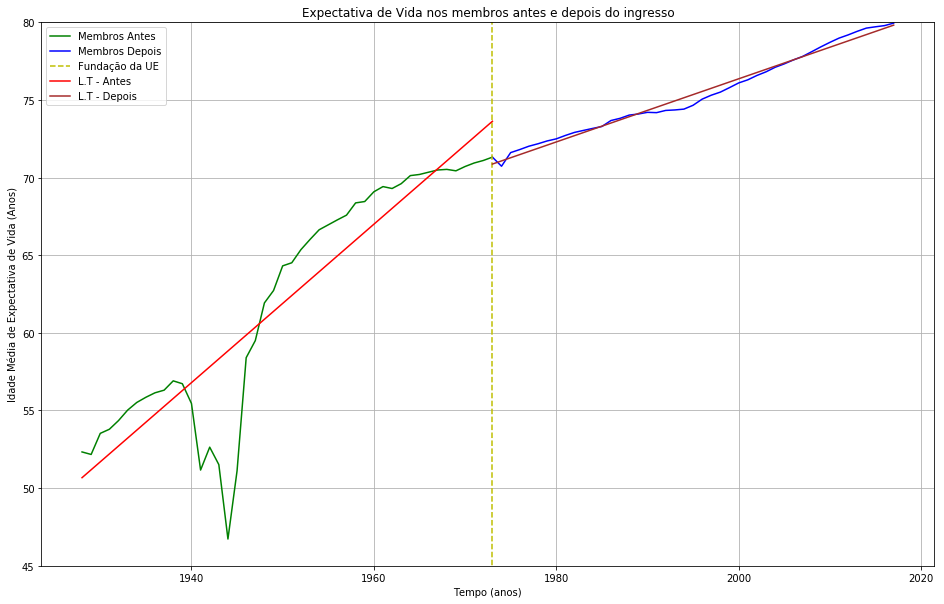

In [41]:
plt.figure(figsize = (16, 10))
plt.plot(media_life_membros_antes, label = 'Membros Antes', color = 'green')
plt.plot(media_life_membros_depois, label = 'Membros Depois', color = 'blue')
plt.plot([1973,1973],[0,82], 'y--', label = 'Fundação da UE')


#  ------------------------------------------
x  = intervalo_anos_antes
y3 = media_life_membros_antes

b, m3 = polyfit(x, y3, 1)
plt.plot(x, b + m3*x, '-', color = 'red', label = 'L.T - Antes')

print("Coeficiente ângular da linha de tendência antes: {0}".format(m3))
# ----------------------------------
x  = intervalo_anos_depois
y4 = media_life_membros_depois

b, m4 = polyfit(x, y4, 1)
plt.plot(x, b + m4*x, '-', color = 'brown', label = 'L.T - Depois')

print("Coeficiente ângular da linha de tendência depois: {0}".format(m4))
# ------------------------------------

plt.ylim(45,80)
plt.xlabel('Tempo (anos)')
plt.ylabel('Idade Média de Expectativa de Vida (Anos)')
plt.title('Expectativa de Vida nos membros antes e depois do ingresso')
plt.legend()
plt.grid(True)
plt.show()

### No gráfico abaixo é possível verificar através das linhas de tendência plotadas,  a tendência da Expectativa de Vida dos países não membros da União Europeia antes e depois da fundação do Bloco Econômico. Com isso podemos verificar que antes da fundação da União Europeia a Expectativa de Vida vinha aumentando cerca de 60.0% ao ano. E após esse aumento gigantesco, como nos países membros houve uma grande redução nesse percentual, caindo para cerca de 20.0% ao ano. 

Coeficiente ângular da linha de tendência antes: 0.6122325704717171
Coeficiente ângular da linha de tendência depois: 0.2326259604975117


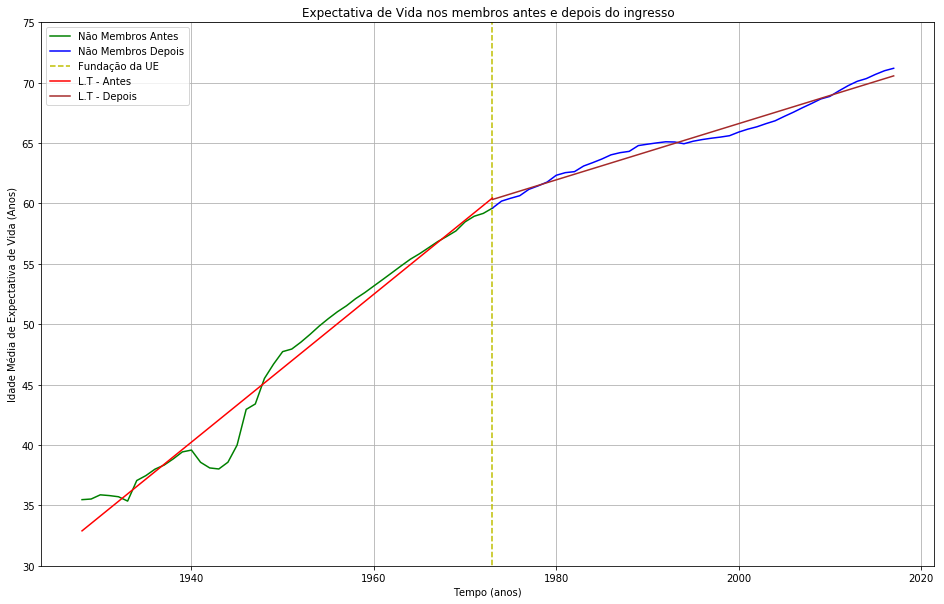

In [52]:
plt.figure(figsize = (16, 10))
plt.plot(media_life_nao_membros_antes, label = 'Não Membros Antes', color = 'green')
plt.plot(media_life_nao_membros_depois, label = 'Não Membros Depois', color = 'blue')
plt.plot([1973,1973],[0,82], 'y--', label = 'Fundação da UE')


#  ------------------------------------------
x  = intervalo_anos_antes
y7 = media_life_nao_membros_antes

b, m7 = polyfit(x, y7, 1)
plt.plot(x, b + m7*x, '-', color = 'red', label = 'L.T - Antes')

print("Coeficiente ângular da linha de tendência antes: {0}".format(m7))
# ----------------------------------
x  = intervalo_anos_depois
y8 = media_life_nao_membros_depois

b, m8 = polyfit(x, y8, 1)
plt.plot(x, b + m8*x, '-', color = 'brown', label = 'L.T - Depois')

print("Coeficiente ângular da linha de tendência depois: {0}".format(m8))
# ------------------------------------

plt.ylim(30,75)
plt.xlabel('Tempo (anos)')
plt.ylabel('Idade Média de Expectativa de Vida (Anos)')
plt.title('Expectativa de Vida nos membros antes e depois do ingresso')
plt.legend()
plt.grid(True)
plt.show()

### Dessa forma podemos verificar que mais uma vez a hipótese foi refutada. Pois, tanto os países membros quanto os países não membros apresentaram comportamento semelhante ao que se diz respeito a Expectativa de Vida. Ambos apresentaram no início da análise um disparo na qualidade de vida e após o estabelecimento da União Europeia houve uma redução brusca nos dois casos para algo em torno de 20.0% ao ano.

### Podemos concluir então que não necessáriamente um país ao entrar na União Europeia têm seus indicadores alterados de forma prevista. Ou seja, ao entrar no bloco a taxa de fertilidade cai abrutamente e a expectativa de vida aumenta rápidamente. Isso foi observado ao plotar o gráfico da linha de tendência dessas séries que justamente mostram a tendência dessas taxas ao longo do tempo. Isso se mostrou bem diferente do que o descrito no mecânismo. Muito embora no estudo apontado nas referências, demonstra que a hipótese e verificável  na maioria dos casos. Demonstrando talvez que a estratégia das médias anuais não seja a mais adequada para essa análise.

### Mesmo assim, será que esses índices apresentam alguma possível ralação?

In [57]:
media_life_membros_depois.corr(media_babies_membros_depois)

-0.8091539520895132

### Acima vemos que ao usar a biblioteca Pandas e calcular a correlação entre essas duas variáveis, o resultado demonstra que elas podem sim estar intimamente ligadas. Apresentando coeficiente de relação de praticamente 80.0%

### Abaixo conseguimos observar que essa correlação pode ser melhor claramente descrita no gráfico. Mostrando que há, possívelmente, uma correlação negativa. Ou seja, a medida que uma aumenta, a outra diminui. Comportamento verificado no gráfico, Dessa forma essa parte da hipótese pode ser confirmada matemáticamente.

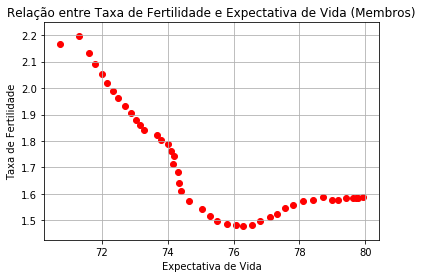

In [59]:
plt.scatter(media_life_membros_depois, media_babies_membros_depois, color = "red" )
plt.title("Relação entre Taxa de Fertilidade e Expectativa de Vida (Membros)")
plt.xlabel("Expectativa de Vida")
plt.ylabel("Taxa de Fertilidade")
plt.grid(True)
plt.show()